In [2]:
import numpy as np 
import pandas as pd 
import sklearn 
from sklearn import model_selection 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.svm import SVC, LinearSVC 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pickle

In [8]:
features = pickle.load(open('features', 'rb'))
labels = pickle.load(open('labels', 'rb'))
print(len(features), len(labels))

4320 4320


In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, labels, test_size=0.2, random_state=42)

In [13]:
clf = LinearSVC(C=1.0, loss='squared_hinge', 
                penalty='l2', multi_class='ovr')
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
def plot_confusion_matrix(y_true,y_pred): 
	cm_array = confusion_matrix(y_true,y_pred) 
	true_labels = np.unique(y_true) 
	pred_labels = np.unique(y_pred) 
	plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues) 
	plt.title("Confusion matrix", fontsize=16) 
	cbar = plt.colorbar(fraction=0.046, pad=0.04) 
	cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12) 
	xtick_marks = np.arange(len(true_labels)) 
	ytick_marks = np.arange(len(pred_labels)) 
	plt.xticks(xtick_marks, true_labels, rotation=90) 
	plt.yticks(ytick_marks,pred_labels) 
	plt.tight_layout() 
	plt.ylabel('True label', fontsize=14) 
	plt.xlabel('Predicted label', fontsize=14) 
	fig_size = plt.rcParams["figure.figsize"] 
	fig_size[0] = 12 
	fig_size[1] = 12 
	plt.rcParams["figure.figsize"] = fig_size 

In [16]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 70.1%


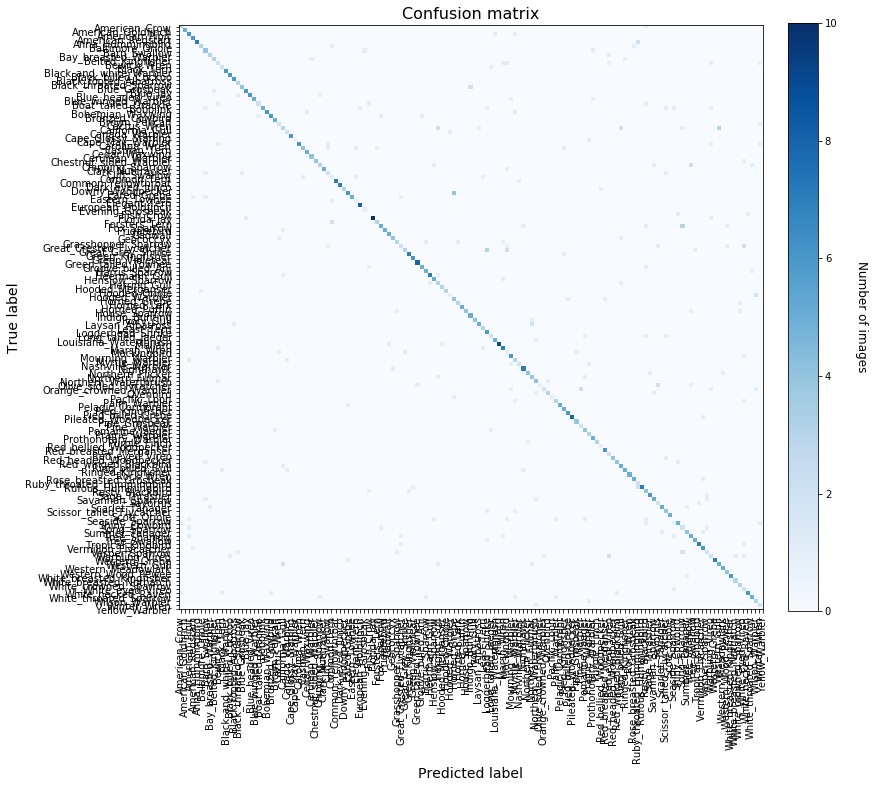

In [18]:
plot_confusion_matrix(y_test,y_pred)